In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from matplotlib import pyplot as plt

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Convolution2D(512, (3, 3), input_shape=(64, 64, 3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=9, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory('../Backend/pest/train',
                                                 target_size=(64,64),
                                                 batch_size=12,
                                                 class_mode='categorical'
                                                 )


Training the data...

Found 2700 images belonging to 9 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('../Backend/pest/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical'
                                            )

Found 450 images belonging to 9 classes.


In [ ]:
history=classifier.fit(training_set,epochs = 50,validation_data = test_set,verbose = 1)
classifier.save(r"../Backend/models/CNNcroppest.h5")

Epoch 1/50
225/225 [==============================] - 315s 1s/step - loss: 2.1728 - accuracy: 0.1452 - val_loss: 2.0952 - val_accuracy: 0.1867
Epoch 2/50
225/225 [==============================] - 36s 159ms/step - loss: 1.9612 - accuracy: 0.2633 - val_loss: 1.8685 - val_accuracy: 0.3067
Epoch 3/50
225/225 [==============================] - 34s 150ms/step - loss: 1.7407 - accuracy: 0.3567 - val_loss: 1.5738 - val_accuracy: 0.4044
Epoch 4/50
225/225 [==============================] - 34s 149ms/step - loss: 1.5210 - accuracy: 0.4319 - val_loss: 1.3530 - val_accuracy: 0.5044
Epoch 5/50
225/225 [==============================] - 34s 150ms/step - loss: 1.3036 - accuracy: 0.5407 - val_loss: 1.1669 - val_accuracy: 0.5978
Epoch 6/50
225/225 [==============================] - 34s 150ms/step - loss: 1.1236 - accuracy: 0.5970 - val_loss: 0.9676 - val_accuracy: 0.6711
Epoch 7/50
225/225 [==============================] - 36s 158ms/step - loss: 0.9170 - accuracy: 0.6859 - val_loss: 0.8745 - val_accu

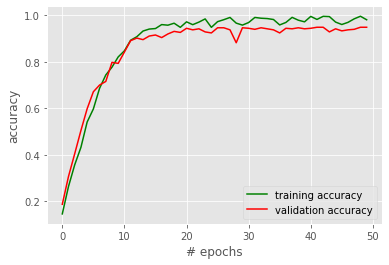

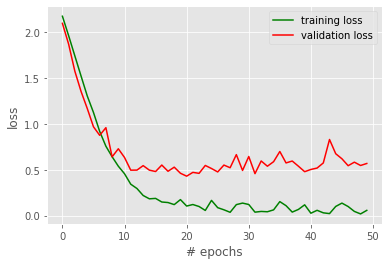

0.948888897895813


In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('../Backend/models/cropcnnacc.png')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('../Backend/models/cropcnnloss.png')
plt.show()


vgg_acc=history.history['val_accuracy'][-1]

print(vgg_acc)